In [18]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
input_path = '../data/raw/yahoo_finance_data.csv'
df = pd.read_csv(input_path)

In [6]:
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2021-01-01,AAPL,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,BTC-USD,28994.009766,29600.626953,28803.585938,29374.152344,4.073030e+10
2,2021-01-01,ETH-USD,737.708374,749.201843,719.792236,730.367554,1.365200e+10
3,2021-01-01,GOOGL,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,MSFT,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Date         0
Ticker       0
Open      1368
High      1368
Low       1368
Close     1368
Volume    1368
dtype: int64

In [8]:
finance_cols = ["Open", "High", "Low", "Close", "Volume"]
null_rows = df[finance_cols].isnull().all(axis=1)

In [10]:
clean_df = df[~null_rows].copy()
null_rows.sum()

1368

In [12]:
clean_df[finance_cols] = clean_df[finance_cols].fillna(0)
clean_df.head()

,Date,Ticker,Open,High,Low,Close,Volume
1,2021-01-01,BTC-USD,28994.009766,29600.626953,28803.585938,29374.152344,4.073030e+10
2,2021-01-01,ETH-USD,737.708374,749.201843,719.792236,730.367554,1.365200e+10
6,2021-01-02,BTC-USD,29376.455078,33155.117188,29091.181641,32127.267578,6.786542e+10
7,2021-01-02,ETH-USD,730.402649,786.798462,718.109497,774.534973,1.974077e+10
11,2021-01-03,BTC-USD,32129.408203,34608.558594,32052.316406,32782.023438,7.866524e+10


In [13]:
clean_df.isnull().sum()

Date      0
Ticker    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5932 entries, 1 to 7299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5932 non-null   object 
 1   Ticker  5932 non-null   object 
 2   Open    5932 non-null   float64
 3   High    5932 non-null   float64
 4   Low     5932 non-null   float64
 5   Close   5932 non-null   float64
 6   Volume  5932 non-null   float64
dtypes: float64(5), object(2)
memory usage: 370.8+ KB


In [17]:
clean_df.head(10)

,Date,Ticker,Open,High,Low,Close,Volume
1,2021-01-01,BTC-USD,28994.009766,29600.626953,28803.585938,29374.152344,4.073030e+10
2,2021-01-01,ETH-USD,737.708374,749.201843,719.792236,730.367554,1.365200e+10
6,2021-01-02,BTC-USD,29376.455078,33155.117188,29091.181641,32127.267578,6.786542e+10
7,2021-01-02,ETH-USD,730.402649,786.798462,718.109497,774.534973,1.974077e+10
11,2021-01-03,BTC-USD,32129.408203,34608.558594,32052.316406,32782.023438,7.866524e+10
12,2021-01-03,ETH-USD,774.511841,1006.565002,771.561646,975.507690,4.520046e+10
15,2021-01-04,AAPL,130.248974,130.336766,123.654582,126.239662,1.433019e+08
16,2021-01-04,BTC-USD,32810.949219,33440.218750,28722.755859,31971.914062,8.116348e+10
17,2021-01-04,ETH-USD,977.058838,1153.189209,912.305359,1040.233032,5.694599e+10
18,2021-01-04,GOOGL,87.475385,87.599140,84.848144,85.791985,3.732400e+07


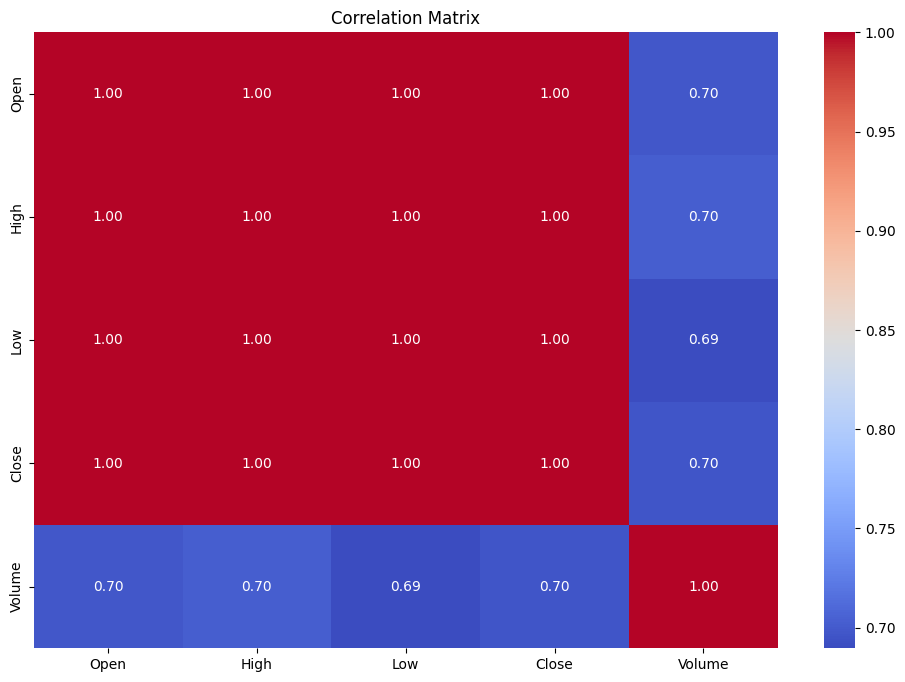

In [19]:
corr = clean_df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()